In [11]:
library(ggplot2)
library(tidyverse)
library(tibble)


### Instructions:

1. it is considered proper programming practice to load all the libraries you need in the first cell of a notebook or at the top of the R-Markdown file. Put all your imports (e.g., `library(ggplot)`) in the cell above.
2. Create as many cells as needed to answer a question
  * Group code that is logically related in the same cell
  * Keep cells relatively small
  * Format long statements or expressions, including `ggplot`, across multiple lines
3. Submit your work to GitHub under your MBIO repository.
  * Folder should be called `4_apply_and_data`
    

### Q1

* Write a function called `sd_x` that computes the standard deviation from first principles. Recall that the standard deviation is computed as

$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N-1}}
$$

* $\mu$ is simply the mean of the vector of inputs
  * it can be computed using the `mean` function


For example, given:

```x = c(1,2,3)```

Since $\mu = 2$, then $\sigma = \sqrt{\frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3}} = 1$.


In [210]:
x <- c(4,7,11,24)
sd_x <- sqrt((sum((x-mean(x))^2))/(length(x)-1))
sd_x

[1] 8.812869

### Q2
Given the following matrix of data where each column consists of a variable: 
1. Convert this data frame into a tibble called data_tbl
2. Use one of the apply-type of functions in conjunction with `sd_x` you wrote previously to compute the standard deviation for each column.


In [38]:
data = matrix(1:50, ncol=5)
colnames(data) = c("variable_1", "variable_2", "variable_3", "variable_4", "variable_5")

In [33]:
data_tbl <- tibble("variable_1"=c(1:10), "variable_2"=c(11:20), "variable_3"=c(21:30), "variable_4"=c(31:40),"variable_5"=c(41:50))
data_tbl

variable_1,variable_2,variable_3,variable_4,variable_5
<int>,<int>,<int>,<int>,<int>
1,11,21,31,41
2,12,22,32,42
3,13,23,33,43
4,14,24,34,44
5,15,25,35,45
6,16,26,36,46
7,17,27,37,47
8,18,28,38,48
9,19,29,39,49


In [110]:
sapply(data_tbl, sd)

variable_1 variable_2 variable_3 variable_4 variable_5 
   3.02765    3.02765    3.02765    3.02765    3.02765

### Q3

* In this question, we will build a simulated dataset for healthy and diseased corals.  You will be creating a `tibble` called `coral_health_tbl` that contains 2 columns:

1. A column called `coral`. Generate this column by sampling 100 coral species from the following values
```
coral_pop = c("Montipora capitata",
  "Porites compressa",
  "Porites lobata")
```
 * You can use the function `sample` to select 100 values from the vector `coral_pop`
   * You can see how the function sample works [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample)
 
2. The second column is called `is_diseased`.
    * it represents 100 randomly selected `TRUE` or `FALSE` values that represent whether the coral is healthy or diseased.
    * Healthy corals (`is_diseased == FALSE`; not diseased) occur with a probability of 0.8, i.e. (`is_diseased == TRUE`) occurs with a probability of 0.2


In [213]:
coral_pop = c("Montipora capitata", "Porites compressa", "Porites lobata")
head(sample(coral_pop, 100, TRUE))

[1] "Montipora capitata" "Porites compressa"  "Montipora capitata"
[4] "Montipora capitata" "Porites lobata"     "Porites compressa"

In [214]:
diseased_sample <- c("TRUE", "FALSE")
is_diseased <- sample(diseased_sample, 100, TRUE, prob = c(0.2, 0.8))

In [215]:
coral_health_tbl <-as_tibble(cbind(coral_pop, is_diseased))

Warning message in cbind(coral_pop, is_diseased):
“number of rows of result is not a multiple of vector length (arg 1)”


In [216]:
head(coral_health_tbl)

coral_pop,is_diseased
<chr>,<chr>
Montipora capitata,FALSE
Porites compressa,FALSE
Porites lobata,FALSE
Montipora capitata,FALSE
Porites compressa,FALSE
Porites lobata,FALSE


### Q4

* The function `rnorm` is used to sample (i.e., produce) random values from a normal distribution. The syntax of the function is as follows:
```
rnorm(n, mu, sd)
```
where n is the number of samples to generate, mu is the mean of the distribution and `sd` is the standard deviation.

Essentially what the function does is generate `n` random values from a normal distribution that is centered around the mean `mu` and has the standard deviation defined by the parameter `sd`. If you do not understand what this statement means, you should not worry as we will cover it in greater detail in the next section. However, you must know that this function generates n random values that are in some way close to the provided mean (`mu`) you provided.

Use the cell below to experiment with the function `rnorm`. E.g.: try to generate 5 values from the distribution with a mean 10 and a standard deviation 1.

In [203]:
rnorm(5, 10, 1)

[1]  7.970775  9.292247 10.593209  9.900127  9.853108

### Q5
* Create a new column in `coral_health_tbl` called `coral_cover`. This column represents coral cover values for the corals observed in your tibble
* For the healthy coral (`is_diseased == FALSE`), sample the cover values from a normal with a mean of 9 and standard deviation of 2
* For the diseased corals (`health_status = TRUE`), sample the cover values from a normal with mean 1 and std of 3
* Note that this is a perfect scenario for using `mapply`


In [201]:
cover = function(x){
    if (x == FALSE){
        rnorm(1, 9, 2)
    }else{
        rnorm(1, 1, 3)
    }}
coral_health_tbl$coral_cover <- mapply(cover, coral_health_tbl$is_diseased)

In [202]:
head(coral_health_tbl)

coral_pop,is_diseased,coral_cover,binary_health_status
<chr>,<chr>,<dbl>,<int>
Montipora capitata,FALSE,10.236527,1
Porites compressa,TRUE,-3.279744,0
Porites lobata,TRUE,2.151054,0
Montipora capitata,FALSE,6.868927,1
Porites compressa,FALSE,5.256319,1
Porites lobata,FALSE,10.403747,1


### Q6

* Add another column called `binary_health_status`.
 * set the column to 0 if `is_diseased == FALSE`
 * set the column to 1 if `is_diseased == TRUE`

* A trick here is to remember that:
  1. Corecing (converting) a logical can be done with `as.integer()`
  2. `as.integer(TRUE)` returns 1
  3. `as.integer(FALSE)` returns 0




In [199]:
x <- coral_health_tbl$is_diseased==FALSE
y <- coral_health_tbl$is_diseased==TRUE
coral_health_tbl$binary_health_status <- as.integer(x,y)

In [200]:
head(coral_health_tbl)

coral_pop,is_diseased,coral_cover,binary_health_status
<chr>,<chr>,<dbl>,<int>
Montipora capitata,FALSE,7.0064903,1
Porites compressa,TRUE,0.5592136,0
Porites lobata,TRUE,-2.9460473,0
Montipora capitata,FALSE,10.1731879,1
Porites compressa,FALSE,11.0095889,1
Porites lobata,FALSE,4.8542030,1


### Q7

* Plot the distribution of `coral_cover` for healthy versus diseased corals
* Note that I am using the histogram `geom`
  * Histograms need only an `x`-axis because the `y` is typically computed as the number of items occurring in a bin of some predetermined width.
    * However, instead of a raw count, we want a normalized count. You can normalize the count by setting `y = stat(count / sum(count))`  
  * I am coloring the bin outlines in black and filling in grey for disease and white for healthy
  * I am using `binwidth=1'.
* Use the `labs` function to add a title and to change the labels for the `x` and `y` axes
* The plot should look "somewhat" like the following
![](https://www.dropbox.com/s/wdbdj05rd50vb0k/healthy-diseased.png?dl=1)

In [238]:
coralhis <- ggplot(coral_health_tbl, aes(x=coral_cover, y=stat(count/sum(count)), fill=is_diseased))+
geom_histogram(color = "black", binwidth=1, alpha= 0.6)+
scale_fill_manual(values = c("#FFFFFF","#7E7E7E"))+
labs(
    title = "Total Coral Coverage (Healthy vs. Diseased)", 
    x="Coral Cover", 
    y="Normalized Proportion", 
    fill="Health Status")
coralhistogram <- coralhis + theme(text = element_text(size =16))

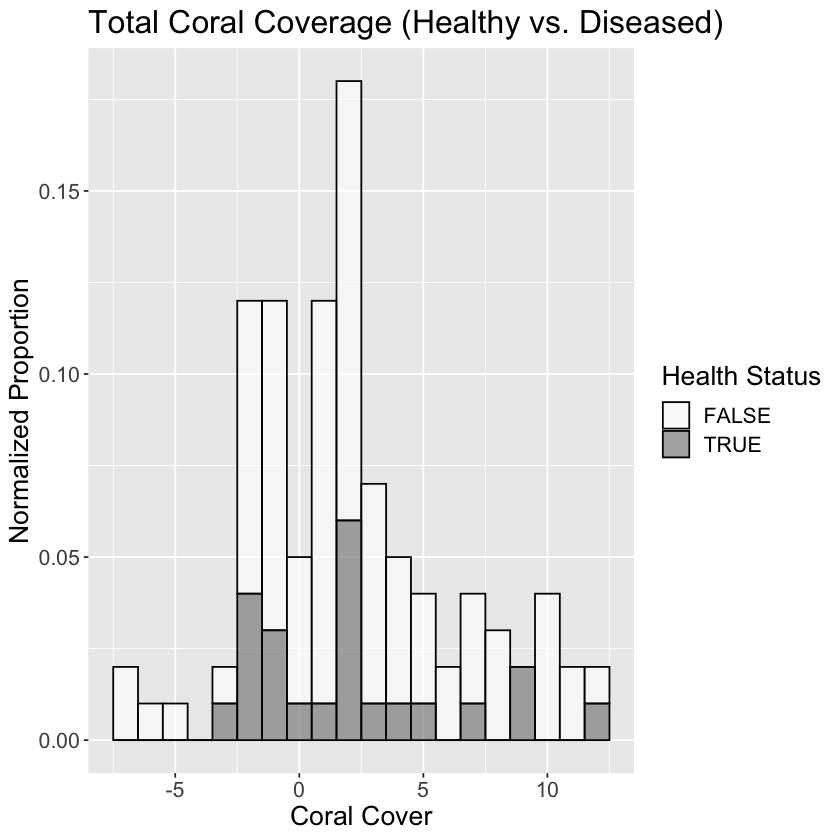

In [239]:
coralhistogram

### Q8

* Use `geom_density` to mirror the information conveyed in the histogram above using density curves instead of histograms.
  * Set the `adjust` parameter of `geom_density` to `2`
* Change the `xlim` scale so that we can see the edges of the curves
  * I.e., curves should not be cut off
  
* The resulting curve will look like the following
![](https://www.dropbox.com/s/rs4rx0w6ur8p5wq/coral_distr_practical.png?dl=1)


In [236]:
coralden <- ggplot(coral_health_tbl, aes(x= coral_cover, y= stat(count/sum(count)), fill= is_diseased))+
geom_density(adjust= 2, alpha= 0.6)+ scale_x_continuous(limits= c(-10,19))+
scale_fill_manual(values= c("#FFFFFF","#7E7E7E"))+
labs(
    title= "Total Coral Coverage (Healthy vs. Diseased)",
    x= "Coral Cover",
    y= "Normalized proportion",
    fill= "Health Status")
coraldensity <- coralden + theme(text=element_text(size=14))

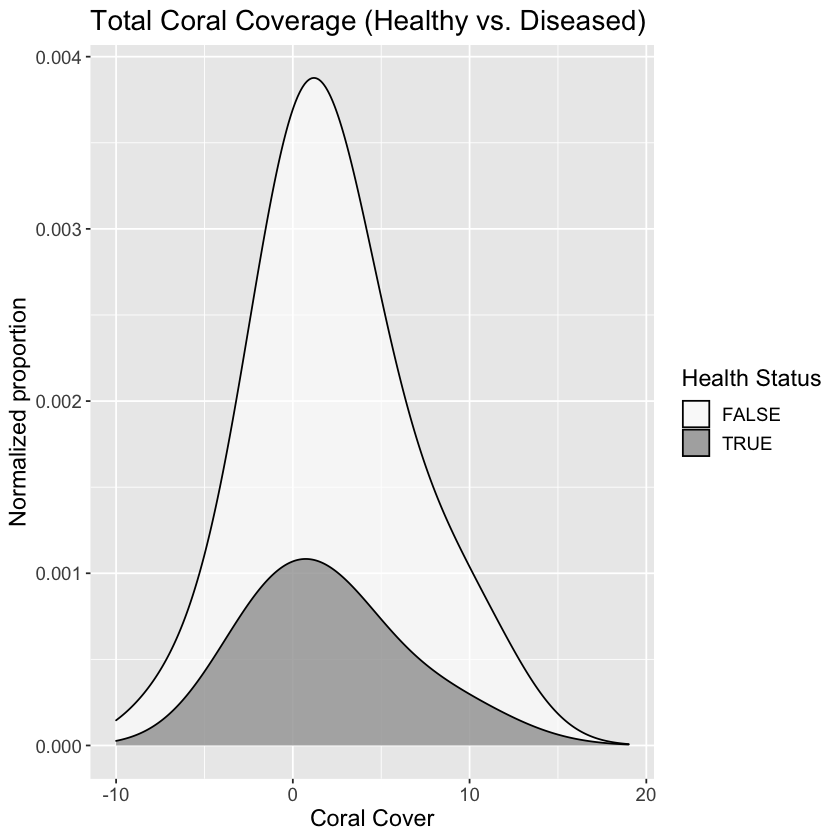

In [237]:
coraldensity

### Q9

You have been provided with the dataset illustrated in the image below, which contains counts for 20 fish species across 5 locations. For convenience, only two species and 2 locations are illustrated here. Based on your knowledge of tidy data, how can you format the data shown in this file in a way that is considered `tidy`. Provide an image of a hand-drawn table (or tables if needed) that represents the table format. Briefly justify your answer in a 3-4 sentences.


![](https://www.dropbox.com/s/ucvj0gburg8at60/tidy_data.png?dl=1)

![](https://drive.google.com/file/d/1yHBOgfXSzHAnLF-G50VLqGHqAV5Xm7-O/view?usp=sharing)

Image URL (just incase you also cannot see my imported image since I am having trouble visualizing it!): https://drive.google.com/file/d/1yHBOgfXSzHAnLF-G50VLqGHqAV5Xm7-O/view?usp=sharing

In the provided data the genus and species were put in the same column and therefore cause multiple variables to be in a single column so I chose to separate them into individual columns. This would allow for the genus or species to be called separately and would help with tidiness if genera had multiple species within the same data set. I also created a column for location so that instead of two separate tables containing the same variables it would form a singular table. Creating separate columns for each features (i.e. location, species, count) will allow for future data analysis to be much smoother. 